# 평가

### 분류모델 평가

#### 정확도 (Accuracy)
- 전체 샘플 중에서 올바르게 예측한 샘플의 비율
- 데이터가 불균형한 경우 정확도는 비현실적인 성능을 낼 수 있음

In [21]:
from sklearn.base import BaseEstimator
import numpy as np

# 성별로만 판별하는 모델 작성
class MyTitanicClassifier(BaseEstimator):
    def fit(self, X, y):
        # 훈련 메서드
        pass
    
    def predict(self, X):
        # 결과 예측 메서드
        pred = np.zeros((X.shape[0], 1)) # 일단 다 생존x로 넣기
        for i in range(X.shape[0]):
            sex = X['Sex'].iloc[i]
            if sex == 0:        # 여성이라면
                pred[i] = 1    # 생존
        return pred

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def fillna(df):
    """
    결측치 처리 함수
    - Age : 평균치로 대체
    - Cabin : 'N' 기본값으로 대체
    - Embarked : 'N' 기본값으로 대체
    """
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')

    return df

def drop_feature(df):
    """
    모델 훈련과 관련 없는 속성 제거
    - PassengerId, Name, Ticket
    """
    return df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    - Sex, Cabin, Embarked
    """
    df['Cabin'] = df['Cabin'].str[:1]

    categories = ['Sex', 'Cabin', 'Embarked']
    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])

    return df
    
def scailing_feature(train_data, test_data):
    """
    특성 스케일링
    """
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)

    return train_scaled, test_scaled

def preprocess_data(df):
    df = drop_feature(df)
    df = fillna(df)
    df = encode_feature(df)

    return df

In [23]:
def preprocess_data(df):
    df = drop_feature(df)
    df = fillna(df)
    df = encode_feature(df)
    
    return df

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/titanic.csv')

# 입력/라벨 데이터 분리
X = df.drop(['Survived'], axis=1)
y = df['Survived']

# 전처리
X = preprocess_data(X)

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((668, 8), (223, 8), (668,), (223,))

In [25]:
from sklearn.metrics import accuracy_score
# 모델 훈련
my_classifier = MyTitanicClassifier()
my_classifier.fit(X_train, y_train)

# 예측
pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)
# print(pred_train, pred_test)

# 평가 (accuracy_score 사용)
print('훈련 데이터 정확도: ', accuracy_score(y_train, pred_train))
print('평가 데이터 정확도: ', accuracy_score(y_test, pred_test))

훈련 데이터 정확도:  0.7889221556886228
평가 데이터 정확도:  0.7802690582959642


---

![](https://d.pr/i/rtYBJv+)

In [5]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [27]:
matrix = confusion_matrix(y_test, pred_test)
matrix

array([[115,  24],
       [ 25,  59]])

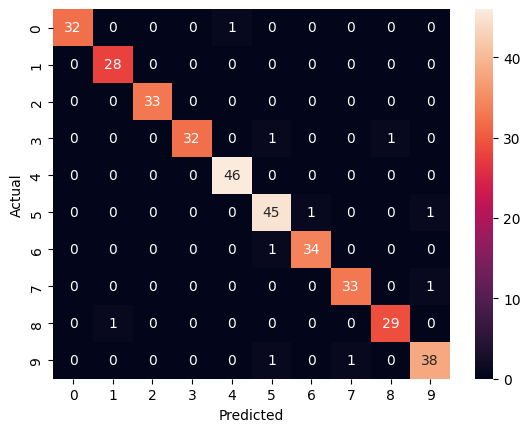

In [6]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- 정밀도 (Precision)
    - 양성이라고 예측한 것(TP + FP) 중에 실제 양성 (TP)일 확률
    - 정밀도가 중요한 지표인 경우: 음성인 데이터를 양성으로 예측하면 안되는 경우 (스팸메일 분류 등)

In [28]:
p_score = 59 / (24 + 59)
p_score, precision_score(y_test, pred_test)

(0.7108433734939759, 0.7108433734939759)

- 재현율
    - 실제 양성 (TP + FN) 중에 양성으로 예측(TP)한 확률
    - 재현율이 중요한 지표인 경우: 양성인 데이터를 음성으로 예측하면 안되는 경우(암 진단, 보험/금융 사기 등)

In [29]:
recall_score(y_test, pred_test)

0.7023809523809523

In [30]:
# 잘못 학습된 모델 만들어보기 (2)
class MyDeathClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((X.shape[0], 1)) # 전부 사망

my_classifier = MyDeathClassifier()
my_classifier.fit(X_train, y_train)

pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

print('훈련 데이터 혼동행렬:\n', confusion_matrix(y_train, pred_train))
print('훈련 데이터 정확도:\n', accuracy_score(y_train, pred_train))
print('훈련 데이터 정밀도:\n', precision_score(y_train, pred_train))
print('훈련 데이터 재현율:\n', recall_score(y_train, pred_train))

print('평가 데이터 정밀도:\n', precision_score(y_test, pred_test))
print('평가 데이터 혼동행렬:\n', confusion_matrix(y_test, pred_test))
print('평가 데이터 정확도:\n', accuracy_score(y_test, pred_test))
print('평가 데이터 재현율:\n', recall_score(y_test, pred_test))

훈련 데이터 혼동행렬:
 [[410   0]
 [258   0]]
훈련 데이터 정확도:
 0.6137724550898204
훈련 데이터 정밀도:
 0.0
훈련 데이터 재현율:
 0.0
평가 데이터 정밀도:
 0.0
평가 데이터 혼동행렬:
 [[139   0]
 [ 84   0]]
평가 데이터 정확도:
 0.6233183856502242
평가 데이터 재현율:
 0.0


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# 오차행렬, 정확도, 정밀도, 재현율 계산 및 출력 함수
def evaluate_binary_classification(y_true, y_pred):
    print('혼동행렬: \n', confusion_matrix(y_true, y_pred))
    print(f'정확도: {accuracy_score(y_true, y_pred)}, 정밀도: {precision_score(y_true, y_pred)}, 재현율: {recall_score(y_true, y_pred)}')

In [32]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('./data/titanic.csv')

# 입력/라벨 데이터 분리
X = df.drop(['Survived'], axis=1)
y = df['Survived']

# 전처리
X = preprocess_data(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 훈련
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# 예측 및 평가
pred_train = lr_clf.predict(X_train)
pred_test = lr_clf.predict(X_test)

# 과대 적합을 의심하는 부분들은 크게 보이지 않음
# train은 정밀도가 높고, 재현율이 낮지만 test는 train에 비해 정밀도가 낮아지고, 재현율이 높아짐
# 정밀도와 재현율의 tradeoff
# 정밀도와 재현율은 서로 연관이 있음 (정밀도와 재현율은 반비례 관계: tradeoff)
evaluate_binary_classification(y_train, pred_train)
evaluate_binary_classification(y_test, pred_test)

혼동행렬: 
 [[350  60]
 [ 77 181]]
정확도: 0.7949101796407185, 정밀도: 0.7510373443983402, 재현율: 0.7015503875968992
혼동행렬: 
 [[117  22]
 [ 23  61]]
정확도: 0.7982062780269058, 정밀도: 0.7349397590361446, 재현율: 0.7261904761904762


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---

- 정밀도-재현율의 trade-off
    - 분류 결정 임계치(threshold)를 낮추면? Positive로 예측할 확률이 높아진다!
        - => 정밀도는 낮아지고, 재현율이 높아진다
    - 분류 결정 임계치(threshold)를 높이면? Positive로 예측할 확률이 낮아진다!
        - => 정밀도는 높아지고, 재현율이 낮아진다.

---

In [33]:
pred_proba = lr_clf.predict_proba(X_test)
print(pred_proba[:7]) # 확률값

pred = lr_clf.predict(X_test)
print(pred[:7]) # 확률값에 따라 실제 나온 결과값

[[0.83741741 0.16258259]
 [0.88842911 0.11157089]
 [0.92060845 0.07939155]
 [0.0559761  0.9440239 ]
 [0.29857741 0.70142259]
 [0.50640704 0.49359296]
 [0.09195634 0.90804366]]
[0 0 0 1 1 0 1]


In [34]:
from sklearn.preprocessing import Binarizer

temp_X = [[1, -1, 2],[2, 0, 0],[0, 1.1, 1.2]] # 입력값을 2차원 형태로 만들고
# Binarizer(threshold)
# - threshold보다 크면 1 반환
# - thredhold보다 작거나 같으면 0 반환
binarizer = Binarizer(threshold=0) # Binazier에 대해 threshold(임계치)를 0으로
adj_X = binarizer.fit_transform(temp_X)
adj_X

# 0(threshold)보다 크면 1, 0(threshold)이거나 0(threshold)보다 작으면 0
# [1., 0., 1.],
# [1., 0., 0.],
# [0., 1., 1.]


array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.]])

In [35]:
from sklearn.preprocessing import Binarizer

# 1(생존)일 확률만 가져오고 + 배치 차원 추가
predict_proba_1 = pred_proba[:,1].reshape(-1,1) # 1로 예측할 확률만 뽑아서 넣어놓은 변수

binarizer = Binarizer(threshold=0.5)
custom_pred = binarizer.fit_transform(predict_proba_1)
evaluate_binary_classification(y_test, custom_pred)

# threshold(임계치)를 0.1증가했더니
# 정밀도가 오르고, 재현율은 떨어짐
# 정확도 자체에 대해서는 큰 변동이 없음
binarizer = Binarizer(threshold=0.6)
custom_pred = binarizer.fit_transform(predict_proba_1)
evaluate_binary_classification(y_test, custom_pred)

혼동행렬: 
 [[117  22]
 [ 23  61]]
정확도: 0.7982062780269058, 정밀도: 0.7349397590361446, 재현율: 0.7261904761904762
혼동행렬: 
 [[124  15]
 [ 30  54]]
정확도: 0.7982062780269058, 정밀도: 0.782608695652174, 재현율: 0.6428571428571429


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


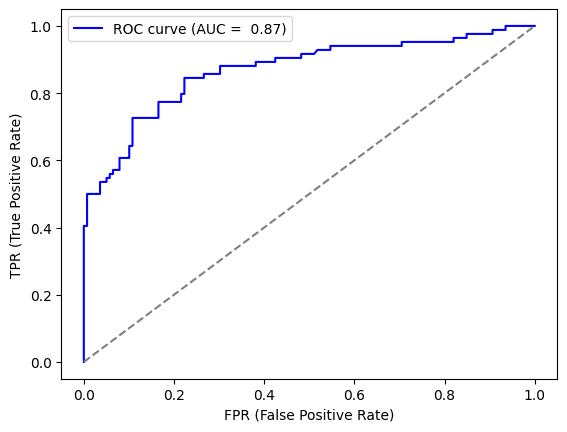

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc: .2f})')
plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()

# 그래프 아래의 면적이 1에 가까울수록 좋다!

### 회귀 모델 평가

In [41]:
# 샘플 데이터
y_true = [3, 0.5, 2, 7]
y_pred = [2.5, 0, 2, 9]


In [42]:
from sklearn.metrics import mean_squared_error          # MSE (평균 제곱 오차)
from sklearn.metrics import root_mean_squared_error     # RMSE (제곱 평균 제곱근 오차)
from sklearn.metrics import mean_absolute_error         # MAE (평균 절대 오차)
from sklearn.metrics import mean_squared_log_error      # MSLE (평균 제곱 로그 오차)
from sklearn.metrics import root_mean_squared_log_error # RMSLE (제곱 평균 제곱근 로그 오차)
from sklearn.metrics import r2_score                    # R^2 (결정 계수)

print(mean_squared_error(y_true, y_pred))
print(root_mean_squared_error(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred))
print(mean_squared_log_error(y_true, y_pred))
print(root_mean_squared_log_error(y_true, y_pred))
print(r2_score(y_true, y_pred))

1.125
1.0606601717798212
0.75
0.058006407800631835
0.2408451946803835
0.8059299191374663
